# CS 1656 – Introduction to Data Science (Spring 2023) 

## Instructor: Alexandros Labrinidis
## Teaching Assistant: Evangelos Karageorgos

## Term Project 

**Released: March 21, 2023**

**Due: April 17, 2023**

### Goal
The goal of this project is to expose you with a real data science problem, looking at the end-to-end pipeline. 

### What to do 
You are asked to write a Python Jupyter notebook, called `bikes_pgh_data.ipynb` and a python file, called `calculations.py`, that will:
* [Task 1] access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data  
* [Task 2] create graphs to show the popularity of the different rental stations, given filter conditions  
* [Task 3] create graphs to show the rebalancing issue  
* [Task 4] cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.  

**Your program should not take more than 15 minutes to run**

### Jupyter Notebook Rules
This skeleton is provided for you to complete the project. Please add your code in the code cells below each Task. Feel free to add cells as needed. Do not remove existing cells.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from calculations import Calculations

# Feel free to add here any other libraries as specified in the project description

For the sake of interactive display in Jupyter, we will enable matplotlib inline.

In [3]:
%matplotlib inline

### [Task 0] Warming Up
Task 0 is for testing. It is used to ensure that this Jupyter Notebook skeleton works on both your machines and our machine. Please run the following code to see if you can see a line plot. The line plot is the basic plot that we have seen in Recitation2. 

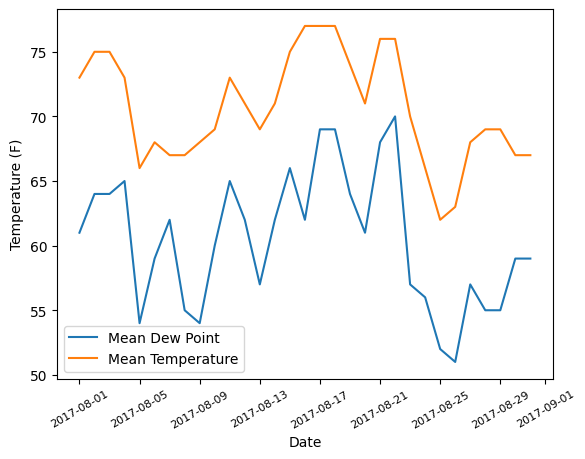

In [4]:
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('KPIT_Aug17.csv', sep=',', engine='python', parse_dates=['EST'])
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])
plt.xticks(rotation=30, fontsize=8)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')

plt.show()

--- 
Add your code below this line

---
### Task 1

In this task you will need to access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data.

### Running Calculations

In [5]:
calculations = Calculations(['HealthyRideRentals2021-Q1.csv', 'HealthyRideRentals2021-Q2.csv', 'HealthyRideRentals2021-Q3.csv'])

### Task 1.1

In [6]:
trips = calculations.get_trips()
trips.head(5)

,Starttime,Bikeid,From station id,To station id,day
0,2021-01-12 12:48:00,70782,49641.0,1061.0,01/12/2021
1,2021-01-13 09:32:00,70578,49391.0,1064.0,01/13/2021
2,2021-01-15 17:43:00,70935,1072.0,1072.0,01/15/2021
3,2021-01-20 16:00:00,70910,1068.0,1032.0,01/20/2021
4,2021-01-24 14:40:00,70910,1032.0,1056.0,01/24/2021


### Task 1.1

In [7]:
daily_counts = calculations.get_daily_counts()
daily_counts.head(10)

,day,station_id,fromCNT,toCNT,rebalCNT
0,01/01/2021,1002,1,1,0
1,01/01/2021,1010,1,0,1
2,01/01/2021,1024,1,1,0
3,01/01/2021,1028,1,1,0
4,01/01/2021,1032,1,0,1
5,01/01/2021,1059,1,1,0
6,01/01/2021,1062,2,2,0
7,01/01/2021,1094,2,0,2
8,01/01/2021,49301,1,2,1
9,01/01/2021,49671,1,0,1


### Task 1.2

In [8]:
monthly_counts = calculations.get_monthly_counts()
monthly_counts.head(10)

,month,station_id,fromCNT,toCNT,rebalCNT
0,01/2021,1000,23,29,24
1,01/2021,1001,18,27,17
2,01/2021,1002,27,27,16
3,01/2021,1003,2,1,3
4,01/2021,1004,20,16,4
5,01/2021,1005,6,3,7
6,01/2021,1006,8,8,12
7,01/2021,1007,9,7,2
8,01/2021,1009,8,3,7
9,01/2021,1010,47,30,31


---
### Task 2

In this task you will need to create graphs to show the popularity of the different rental stations, given filter conditions.

In [10]:
# FILTER VARIABLES -- feel free to edit the values, but the names of the variables must remain 
#                     as they are and should be used by your code accordingly from this point on

filter_month = "04/2021"
filter_stationID = 1046


### Task 2.1

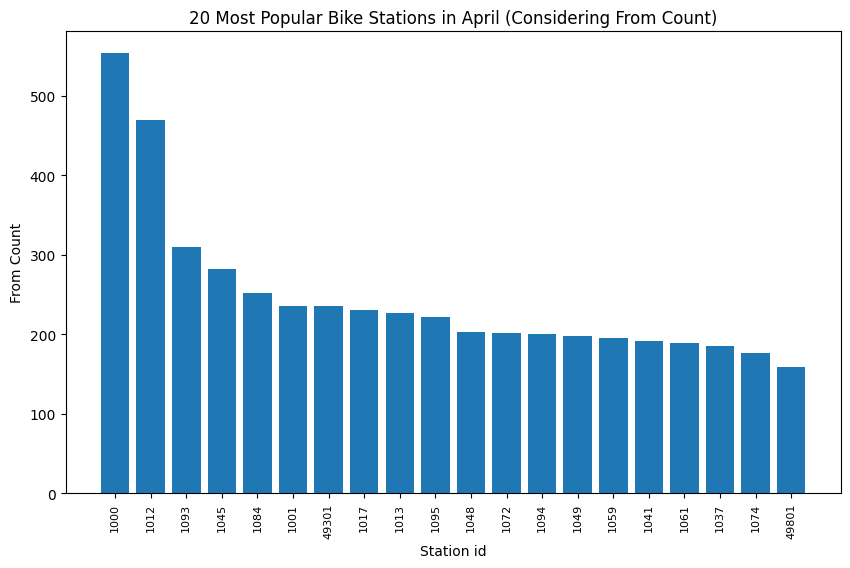

In [11]:
# Filter by month and sort by fromCNT in descending order
top_stations = monthly_counts[monthly_counts['month'].str.contains(filter_month)].sort_values('fromCNT', ascending=False).head(20)

#get month
# Parse the date string and convert it to a datetime object
date_obj = datetime.datetime.strptime(filter_month, '%m/%Y')

# Extract the month as a string using strftime()
month_str = date_obj.strftime('%B')

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_stations['station_id'])), top_stations['fromCNT'])
plt.title(f"20 Most Popular Bike Stations in {month_str} (Considering From Count)")
plt.xticks(range(len(top_stations['station_id'])), top_stations['station_id'],\
               rotation = 90, fontsize = 8)
plt.xlabel('Station id')
plt.ylabel('From Count')
plt.show()

### Task 2.2

In [13]:
#filter out counts for the month and the station id for the 30 days
filter_month_range_min = pd.to_datetime("04/01/2021")
filter_month_range_max = pd.to_datetime("04/30/2021")
filtered_counts = daily_counts[(daily_counts['station_id'] == filter_stationID) & \
                               (pd.to_datetime(daily_counts['day']).between(filter_month_range_min, filter_month_range_max))].sort_values('day', ascending= True)

filtered_counts['day'] = pd.to_datetime(filtered_counts['day'])

#create a df with all the days
all_days = pd.date_range(filter_month_range_min, filter_month_range_max, freq='D')
all_days_dt = pd.to_datetime(all_days)
df_all_days_dt = pd.DataFrame({'day': all_days_dt})
# Merge the two dataframes using a left join in order to have all the days
merged = pd.merge(df_all_days_dt, filtered_counts, on='day', how='left')

# Replace NaN values with 0, replace the days without any data
merged.fillna(0, inplace=True)


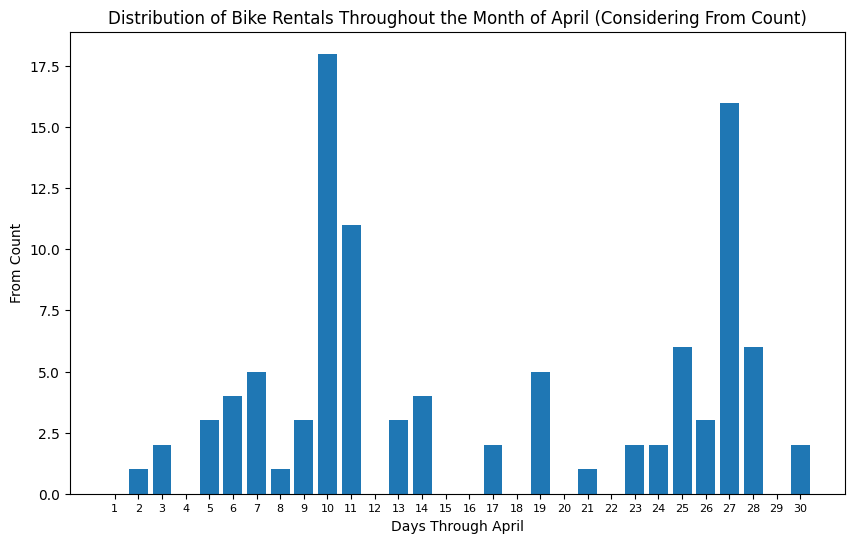

In [14]:
#

plt.figure(figsize =(10,6))
plt.bar(range(len(merged['day'])), merged['fromCNT'])
plt.title(f"Distribution of Bike Rentals Throughout the Month of {month_str} (Considering From Count)")
plt.xticks(range(len(merged['day'])), (str(day.day) for day in merged['day']),\
               rotation = 0, fontsize = 8)
plt.xlabel('Days Through April')
plt.ylabel('From Count')
plt.show()


### Task 2.3

In [30]:
#change trips so we can compare ints
trips2 = trips.dropna()
trips2['From station id'] = trips2['From station id'].astype(int)
trips2 = trips2[(trips2['From station id'] == filter_stationID) & \
                               (pd.to_datetime(trips2['Starttime']).between(filter_month_range_min, filter_month_range_max))]
#filter out counts for the month and the station id for the 30 days
filter_month_range_min = pd.to_datetime("04/01/2021")
filter_month_range_max = pd.to_datetime("04/30/2021")

filtered_counts_hours = daily_counts[(daily_counts['station_id'] == filter_stationID) & \
                               (pd.to_datetime(daily_counts['day']).between(filter_month_range_min, filter_month_range_max))]


combined_df = pd.merge(trips2, filtered_counts_hours, on='day')
print(combined_df)

             Starttime  Bikeid  From station id  To station id         day  \
0  2021-04-02 16:39:00   70958             1046         1048.0  04/02/2021   
1  2021-04-03 10:36:00   70592             1046         1041.0  04/03/2021   
2  2021-04-03 10:37:00   70572             1046         1041.0  04/03/2021   
3  2021-04-05 17:37:00   70661             1046         1046.0  04/05/2021   
4  2021-04-05 17:37:00   70638             1046         1046.0  04/05/2021   
..                 ...     ...              ...            ...         ...   
86 2021-04-28 00:27:00   70304             1046         1046.0  04/28/2021   
87 2021-04-28 13:22:00   70989             1046         1074.0  04/28/2021   
88 2021-04-28 17:08:00   70769             1046         1047.0  04/28/2021   
89 2021-04-28 17:25:00   71157             1046         1013.0  04/28/2021   
90 2021-04-28 20:25:00   70844             1046         1046.0  04/28/2021   

    station_id  fromCNT  toCNT  rebalCNT  
0         1046      

C:\Users\arhat\AppData\Local\Temp\ipykernel_28336\335374784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips2['From station id'] = trips2['From station id'].astype(int)


             Starttime  Bikeid  From station id  To station id         day  \
0  2021-04-02 16:39:00   70958             1046         1048.0  04/02/2021   
1  2021-04-03 10:36:00   70592             1046         1041.0  04/03/2021   
2  2021-04-03 10:37:00   70572             1046         1041.0  04/03/2021   
3  2021-04-05 17:37:00   70661             1046         1046.0  04/05/2021   
4  2021-04-05 17:37:00   70638             1046         1046.0  04/05/2021   
..                 ...     ...              ...            ...         ...   
86 2021-04-28 00:27:00   70304             1046         1046.0  04/28/2021   
87 2021-04-28 13:22:00   70989             1046         1074.0  04/28/2021   
88 2021-04-28 17:08:00   70769             1046         1047.0  04/28/2021   
89 2021-04-28 17:25:00   71157             1046         1013.0  04/28/2021   
90 2021-04-28 20:25:00   70844             1046         1046.0  04/28/2021   

    station_id  fromCNT  toCNT  rebalCNT  hour  
0         1046

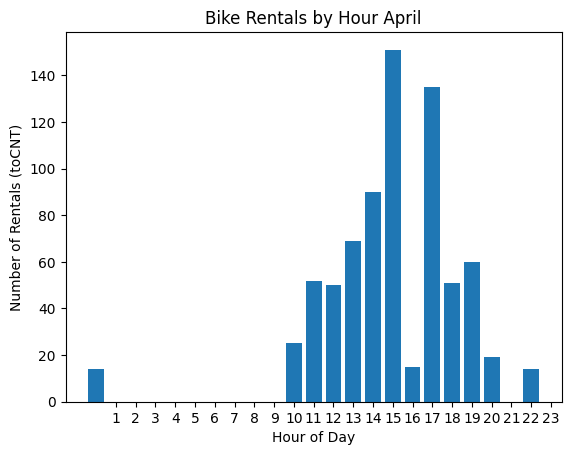

In [65]:

# group the data by hour of the day and sum the fromCNT values
combined_df['hour'] = combined_df['Starttime'].dt.hour

print(combined_df)
# group the data by the hour column and sum the fromCNT values
hourly_counts = combined_df.groupby('hour')['toCNT'].sum()

# display the resulting dataframe
print(hourly_counts)
plt.title(f'Bike Rentals by Hour {month_str}')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rentals (toCNT)')
# set x-ticks to show 1-23 values
plt.xticks(range(1, 24))

# plot the data as a bar chart
plt.bar(hourly_counts.index, hourly_counts)

plt.show()



### Task 2.4

In [16]:
#filter out date range
filtered_dates = trips[trips['Starttime'].dt.date.between(filter_month_range_min, filter_month_range_max)]

#bike counts
bike_count = filtered_dates['Bikeid'].value_counts().sort_values(ascending= False)
top_20_bikes = bike_count[:20]
top_20_bikes_df = top_20_bikes.to_frame().reset_index()
top_20_bikes_df.columns = ['Bikeid', 'count']
print(top_20_bikes_df)


    Bikeid  count
0    70587     51
1    71209     48
2    70955     46
3    70691     43
4    71214     42
5    71205     41
6    70221     41
7    70544     41
8    71225     40
9    71193     39
10   71167     39
11   70931     37
12   70815     36
13   70455     36
14   70770     36
15   70564     36
16   70710     36
17   71188     36
18   70835     35
19   70508     35


C:\Users\arhat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


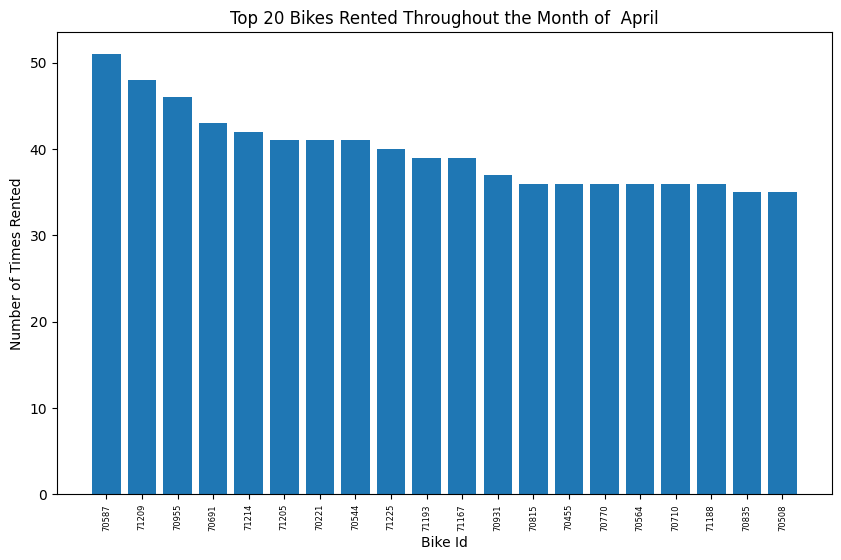

In [17]:
plt.figure(figsize =(10,6))
#x axis is the bike ID, y is the bikeid count
plt.bar(range(len(top_20_bikes_df['Bikeid'])), combined_df['to'])
plt.title(f"Top 20 Bikes Rented Throughout the Month of  {month_str}")
plt.xticks(range(len(top_20_bikes_df['Bikeid'])), top_20_bikes_df['Bikeid'],\
               rotation = 90, fontsize = 6)
plt.xlabel('Bike Id')
plt.ylabel('Number of Times Rented')
plt.show()

---
### Task 3

In this task you will create graphs to show the rebalancing issue.

### Task 3.1

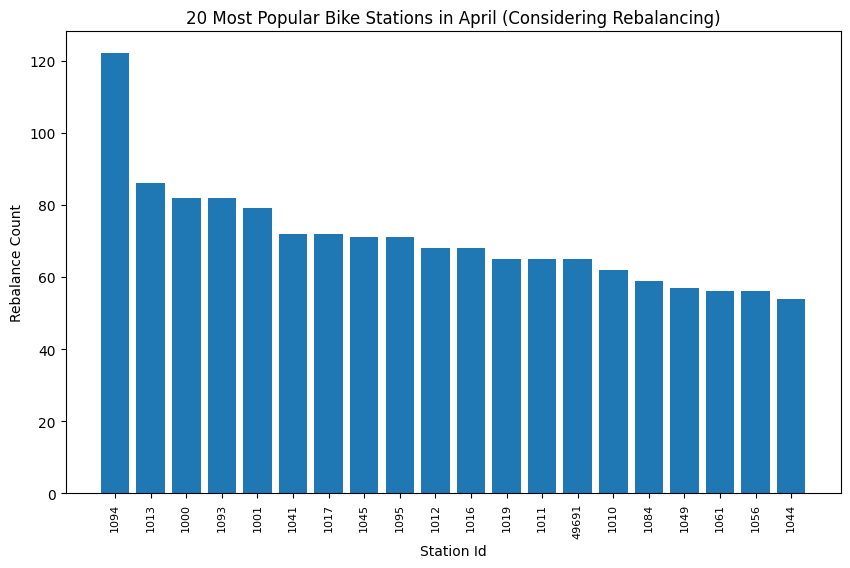

In [18]:
top_stations_rebal = monthly_counts[monthly_counts['month'].str.contains(filter_month)].sort_values('rebalCNT', ascending=False).head(20)


plt.figure(figsize=(10, 6))
plt.bar(range(len(top_stations_rebal['station_id'])), top_stations_rebal['rebalCNT'])
plt.title(f"20 Most Popular Bike Stations in {month_str} (Considering Rebalancing)")
plt.xticks(range(len(top_stations_rebal['station_id'])), top_stations_rebal['station_id'],\
               rotation = 90, fontsize = 8)
plt.xlabel('Station Id')
plt.ylabel('Rebalance Count')
plt.show()

### Task 3.2

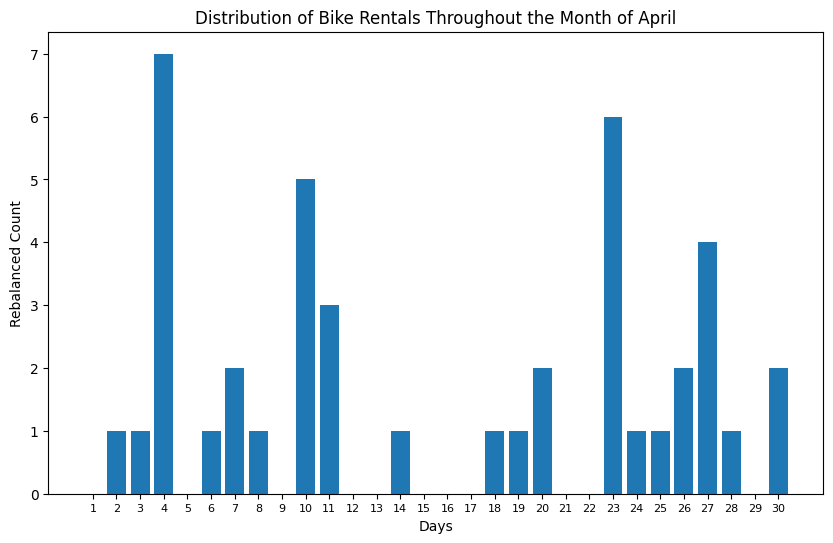

In [19]:
#plt for rebalancing
plt.figure(figsize =(10,6))
plt.bar(range(len(merged['day'])), merged['rebalCNT'])
plt.title(f"Distribution of Bike Rentals Throughout the Month of {month_str}")
plt.xticks(range(len(merged['day'])), (str(day.day) for day in merged['day']),\
               rotation = 0, fontsize = 8)
plt.xlabel('Days')
plt.ylabel('Rebalanced Count')
plt.show()

---
### Task 4

In this task you will cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.

### Task 4.1

In [20]:
#filter out range
range_min = '01/01/2021'
range_max = '03/31/2021'
first_3_months = monthly_counts[pd.to_datetime(monthly_counts['month']).between(range_min, range_max)]

#data for first 3 months of the year
data = {}

for row in first_3_months.values:
    date, stationid, fromCNT, toCNT, rebalCNT = row
    date = pd.to_datetime(date)
    dateMonth = int(date.month)
    #add station to the dictionary if it does not exist yet
    if stationid not in data:
        data[stationid] ={
            #jan
            1:{'fromCNT' : 0, 'rebalCNT': 0},
            #feb
            2:{'fromCNT' : 0, 'rebalCNT': 0},
            #mar
            3:{'fromCNT' : 0, 'rebalCNT': 0}
        }

    #add current month's data into the dictionary
    data[stationid][dateMonth]['fromCNT'] += fromCNT
    data[stationid][dateMonth]['rebalCNT'] += rebalCNT


In [21]:
#kmeans first
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
#initalize k means for 2 clusters
kmeans3 = cluster.KMeans(n_clusters=3, init='k-means++',\
                            random_state= 5000)

#change into dict into 2d array for k means
data_as_df = pd.DataFrame.from_dict(data, orient='index').stack().apply(pd.Series).reset_index()
data_as_df.columns = ['station', 'month', 'fromCNT', 'rebalCNT']
data_as_df = data_as_df.set_index(['station', 'month'])
scaler = StandardScaler()
df_norm = scaler.fit_transform(data_as_df)

#fit the data
kmeans3.fit(df_norm)
labels_kmeans3 = kmeans3.labels_

C:\Users\arhat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


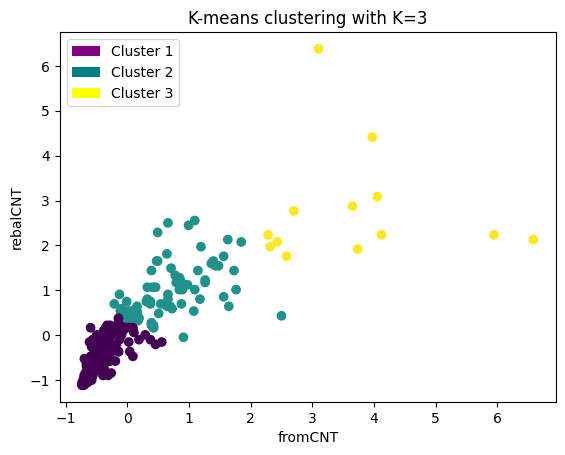

In [22]:
# create a scatter plot of the data points, using different colors for each cluster
plt.scatter(df_norm[:, 0], df_norm[:, 1], c=labels_kmeans3, cmap='viridis')
plt.xlabel('fromCNT')
plt.ylabel('rebalCNT')
plt.title('K-means clustering with K=3')

# Add legend and labels for each cluster
plt.legend(*zip(*[(plt.Circle((0,0),1,fc=col), 'Cluster {}'.format(i+1)) 
                  for i, col in enumerate(['purple', 'teal', 'yellow'])]), loc='upper left')
                  
plt.show()

C:\Users\arhat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


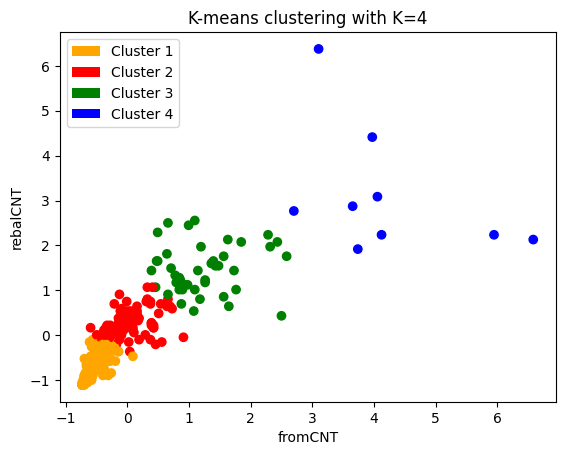

In [23]:
#k-means 4
kmeans4 = cluster.KMeans(n_clusters=4,init='k-means++',\
                            random_state= 5000)

kmeans4.fit(df_norm)
labels_kmeans4 = kmeans4.labels_
# create a scatter plot of the data points, using different colors for each cluster
colors = ['red', 'green', 'blue', 'orange']
plt.scatter(df_norm[:, 0], df_norm[:, 1], c=[colors[label] for label in labels_kmeans4])
plt.xlabel('fromCNT')
plt.ylabel('rebalCNT')
plt.title('K-means clustering with K=4')


# Add legend and labels for each cluster
plt.legend(*zip(*[(plt.Circle((0,0),1,fc=col), 'Cluster {}'.format(i+1)) 
                  for i, col in enumerate(['orange','red', 'green',  'blue'])]), loc='upper left')
plt.show()

C:\Users\arhat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


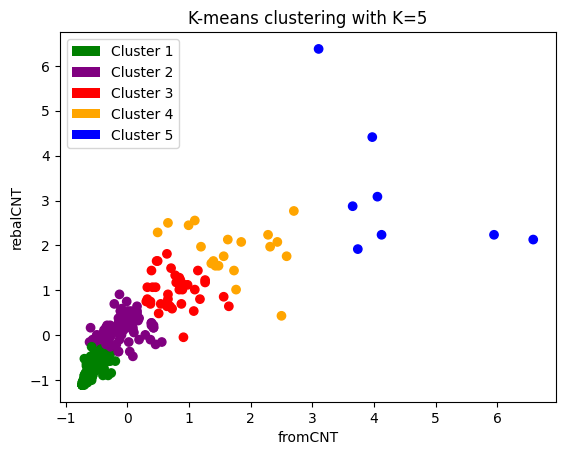

In [24]:
#k-means 5
kmeans5 = cluster.KMeans(n_clusters=5,init='k-means++',\
                            random_state= 5000)

kmeans5.fit(df_norm)
labels_kmeans5 = kmeans5.labels_
# create a scatter plot of the data points, using different colors for each cluster
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.scatter(df_norm[:, 0], df_norm[:, 1], c=[colors[label] for label in labels_kmeans5])
plt.xlabel('fromCNT')
plt.ylabel('rebalCNT')
plt.title('K-means clustering with K=5')

plt.legend(*zip(*[(plt.Circle((0,0),1,fc=col), 'Cluster {}'.format(i+1)) 
                  for i, col in enumerate(['green', 'purple', 'red', 'orange', 'blue'])]), loc='upper left')

plt.show()

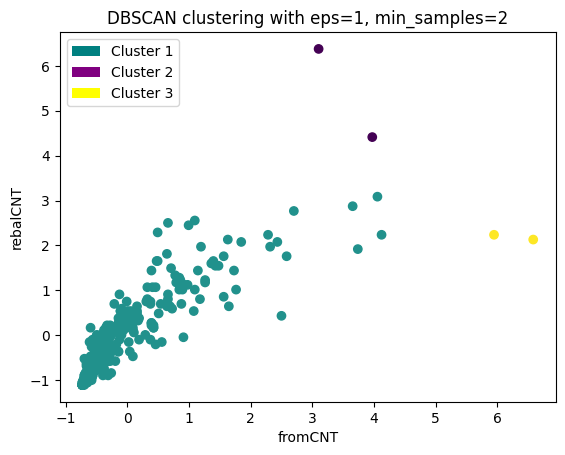

In [25]:
#DB Scan 1
dbscan1 = cluster.DBSCAN(eps=1, min_samples=2)
dbscan1.fit(df_norm)
labels_dbscan1 = dbscan1.labels_

# create a scatter plot of the data points, using different colors for each cluster
plt.scatter(df_norm[:, 0], df_norm[:, 1], c=labels_dbscan1, cmap='viridis')
plt.xlabel('fromCNT')
plt.ylabel('rebalCNT')
plt.title('DBSCAN clustering with eps=1, min_samples=2')

plt.legend(*zip(*[(plt.Circle((0,0),1,fc=col), 'Cluster {}'.format(i+1)) 
                  for i, col in enumerate(['teal','purple', 'yellow'])]), loc='upper left')
plt.show()

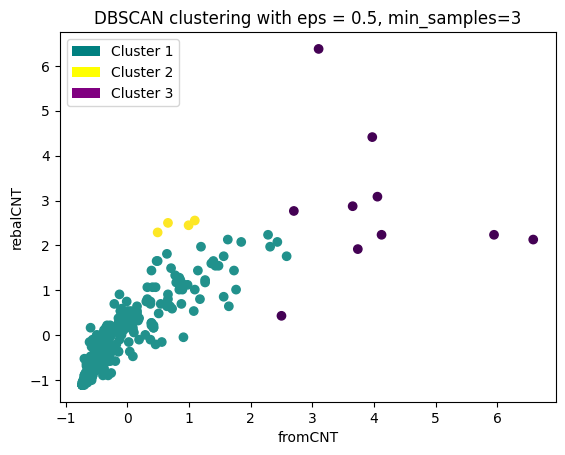

In [26]:
#DB Scan 2
dbscan2 = cluster.DBSCAN(eps=0.5, min_samples=3)
dbscan2.fit(df_norm)
labels_dbscan2 = dbscan2.labels_

# create a scatter plot of the data points, using different colors for each cluster
plt.scatter(df_norm[:, 0], df_norm[:, 1], c=labels_dbscan2, cmap='viridis')
plt.xlabel('fromCNT')
plt.ylabel('rebalCNT')
plt.title('DBSCAN clustering with eps = 0.5, min_samples=3')

plt.legend(*zip(*[(plt.Circle((0,0),1,fc=col), 'Cluster {}'.format(i+1)) 
                  for i, col in enumerate(['teal','yellow', 'purple'])]), loc='upper left')

plt.show()

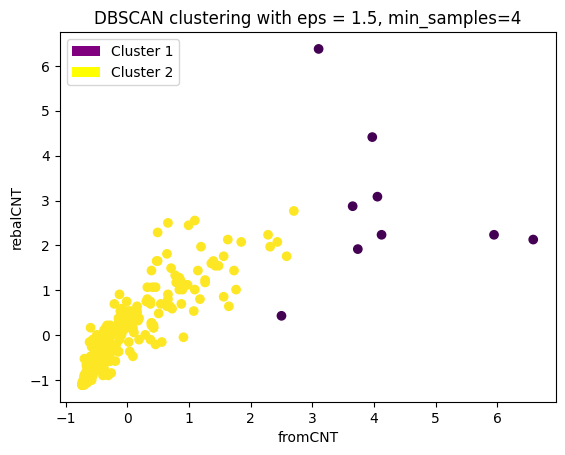

In [27]:
#DB Scan 3
dbscan3 = cluster.DBSCAN(eps=0.75, min_samples=4)
dbscan3.fit(df_norm)
labels_dbscan3 = dbscan3.labels_

# create a scatter plot of the data points, using different colors for each cluster
plt.scatter(df_norm[:, 0], df_norm[:, 1], c=labels_dbscan3, cmap='viridis')
plt.xlabel('fromCNT')
plt.ylabel('rebalCNT')
plt.title('DBSCAN clustering with eps = 1.5, min_samples=4')

plt.legend(*zip(*[(plt.Circle((0,0),1,fc=col), 'Cluster {}'.format(i+1)) 
                  for i, col in enumerate(['purple', 'yellow'])]), loc='upper left')
plt.show()

### Task 4.2

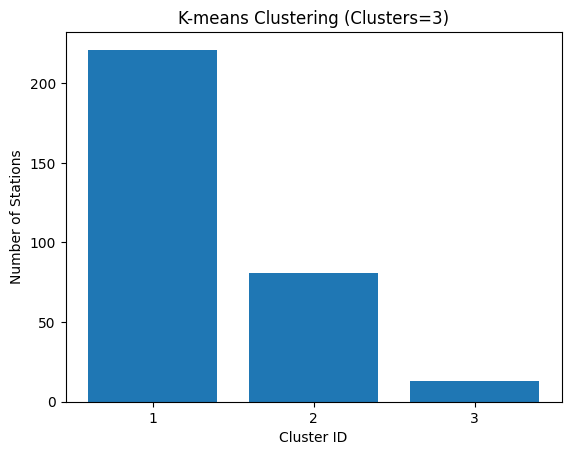

In [28]:
#generate 1 bar chart per algorithim option (6 Different Charts)
# Get the number of stations in each cluster

#CHART for k means 3, the cluster label corresponds to the cluster label in the charts above
cluster_counts_3 = pd.Series(labels_kmeans3).value_counts().sort_index()

plt.bar(range(1, len(cluster_counts_3)+1), cluster_counts_3)
# Create a bar chart of the cluster counts
plt.title('K-means Clustering (Clusters=3)')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Stations')
plt.xticks(range(1, len(cluster_counts_3)+1), cluster_counts_3.index +1 )

plt.show()

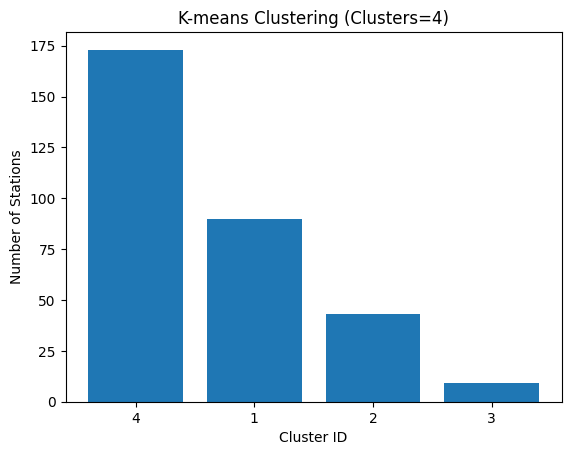

In [29]:
#CHART for k means 4, the cluster label corresponds to the cluster label in the charts above
cluster_counts_4 = pd.Series(labels_kmeans4).value_counts().sort_values(ascending=False)

plt.bar(range(1, len(cluster_counts_4)+1), cluster_counts_4)
# Create a bar chart of the cluster counts
plt.title('K-means Clustering (Clusters=4)')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Stations')
plt.xticks(range(1, len(cluster_counts_4)+1), cluster_counts_4.index +1)


plt.show()

1    151
4     97
0     39
3     20
2      8
dtype: int64


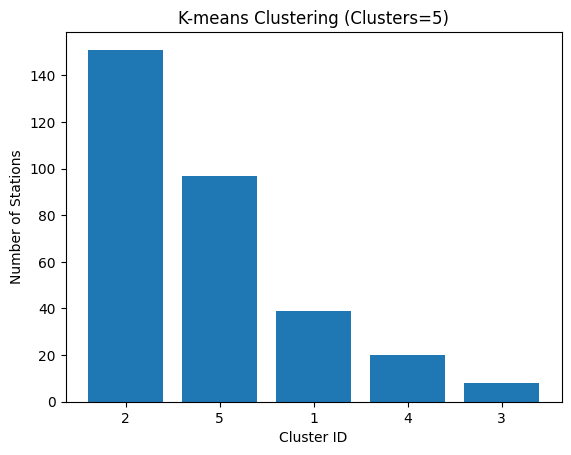

In [30]:
#CHART for k means 3, the cluster label corresponds to the cluster label in the charts above
cluster_counts_5 = pd.Series(labels_kmeans5).value_counts().sort_values(ascending=False)
print(cluster_counts_5)

plt.bar(range(1, len(cluster_counts_5)+1), cluster_counts_5)
# Create a bar chart of the cluster counts
plt.title('K-means Clustering (Clusters=5)')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Stations')
# Set x-axis tick labels to integer values
plt.xticks(range(1, len(cluster_counts_5)+1), cluster_counts_5.index +1 )

plt.show()

 0    311
 1      2
-1      2
dtype: int64


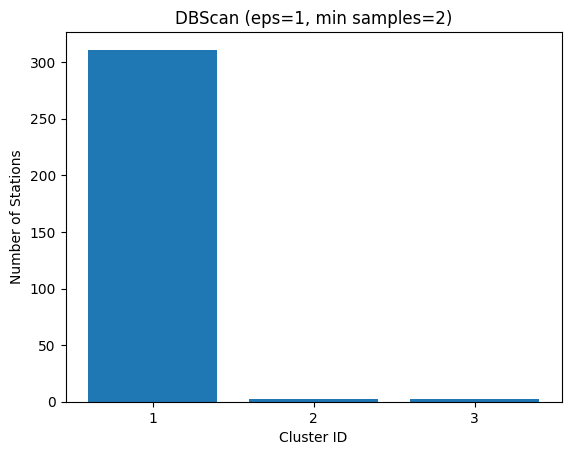

In [43]:
#DB Scan 1
#CHART for dbscan, the cluster label corresponds to the cluster label in the charts above
dbcluster_counts_1 = pd.Series(labels_dbscan1).value_counts().sort_values(ascending=False)
print(dbcluster_counts_1)

plt.bar(range(1, len(dbcluster_counts_1)+1), dbcluster_counts_1)
# Create a bar chart of the cluster counts
plt.title('DBScan (eps=1, min samples=2)')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Stations')
# Set x-axis tick labels to integer values
db_tickLabel = ['1', '2', '3']
plt.xticks(range(1, len(dbcluster_counts_1)+1), db_tickLabel )

plt.show()

 0    301
-1     10
 1      4
dtype: int64


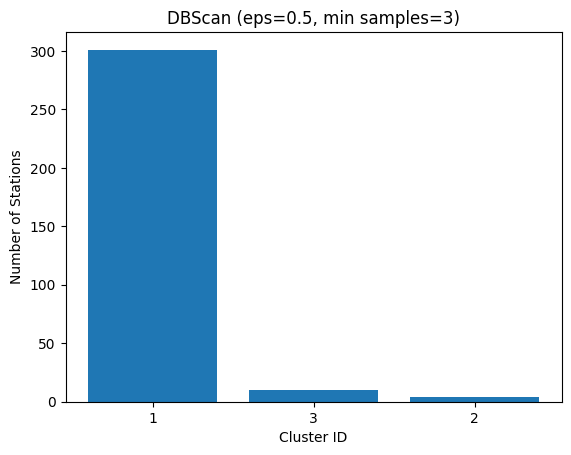

In [45]:
#Db Scan 2
#CHART for dbscan2, the cluster label corresponds to the cluster label in the charts above
dbcluster_counts_2 = pd.Series(labels_dbscan2).value_counts().sort_values(ascending=False)
print(dbcluster_counts_2)

plt.bar(range(1, len(dbcluster_counts_2)+1), dbcluster_counts_2)
# Create a bar chart of the cluster counts
plt.title('DBScan (eps=0.5, min samples=3)')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Stations')
# Set x-axis tick labels to integer values
db_tickLabel2 = ['1', '3', '2']
plt.xticks(range(1, len(dbcluster_counts_2)+1), db_tickLabel2 )

plt.show()

 0    306
-1      9
dtype: int64


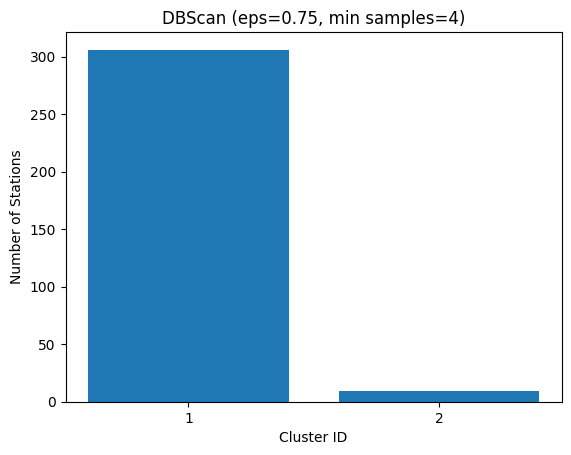

In [41]:
#Db Scan 3
dbcluster_counts_3 = pd.Series(labels_dbscan3).value_counts().sort_values(ascending=False)
print(dbcluster_counts_3)

plt.bar(range(1, len(dbcluster_counts_3)+1), dbcluster_counts_3)
# Create a bar chart of the cluster counts
plt.title('DBScan (eps=0.75, min samples=4)')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Stations')
# Set x-axis tick labels to integer values
db_tickLabel3 = ['1', '2']
plt.xticks(range(1, len(dbcluster_counts_3)+1), db_tickLabel3 )

plt.show()


### Task 4.3

C:\Users\arhat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\arhat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\arhat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\a

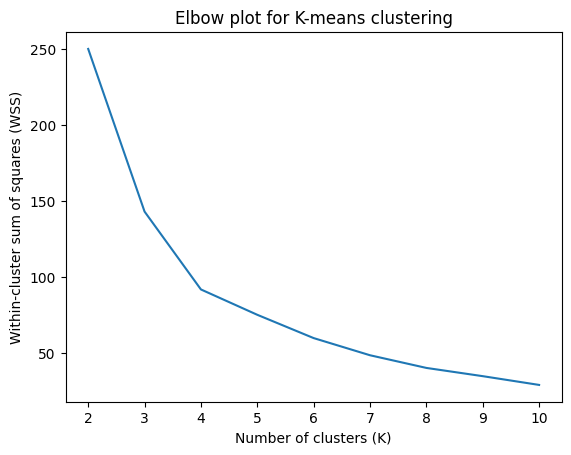

In [27]:
#brief explanation about the optiomal choice of k

# For this data, I experimented with K values ranging from 2 to 10 and computed the WSS for each value of K. 
# I then plotted the WSS as a function of K and visually inspected the plot to identify the elbow point. 
# Based on my analysis, the elbow point appears to be at K= 4/5, as the decrease in WSS begins to level off after K=5.
# In terms of the best algorithm out of the two that I tried (K-means and DBSCAN), 
# it is difficult to make a conclusive comparison without further information about the data and the desired clustering outcome. 
#  However, based on the results of the clustering, K-means seems to produce more clearly separated clusters with less overlap than DBSCAN,
#  which can be useful for certain applications. However, this is not a definitive conclusion 
#  and the optimal algorithm choice may depend on various factors such as the specific characteristics of the data and the goals of the analysis.

# Define the range of K values to test
k_values = range(2, 11)

# Compute the WSS for each value of K
wss_values = []
for k in k_values:
    kmeans = cluster.KMeans(n_clusters=k, random_state=5000)
    kmeans.fit(df_norm)
    wss_values.append(kmeans.inertia_)

# Plot the WSS as a function of K
plt.plot(k_values, wss_values)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-cluster sum of squares (WSS)')
plt.title('Elbow plot for K-means clustering')
plt.show()